In [2]:
import os
import sys
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch
import matplotlib.pyplot as plt
from Naive_DAE import Naive_DAE,Dropout_DAE
import AE_Stats
from load_data_fn import load_data,load_data_no_filter,prep_ttbar

from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader, TensorDataset
import importlib


In [18]:
arr = prep_ttbar(81)

In [121]:
dt_1 = []
dt_2 = []
dt_3 = []

for a in arr:
    
    if a[-4].item() ==0.: 
        dt_1.append(a)
    elif a[-4].item() ==1.0: 
        dt_2.append(a)
    else:
        dt_3.append(a)
    
dt_1 = torch.vstack(dt_1).float()
dt_2 = torch.vstack(dt_2).float()   
dt_3 = torch.vstack(dt_3).float()   

In [55]:
# dt_1 = dt_1*5.0393/25.3514
# dt_2 = dt_2
# dt_3 = dt_3*5.0393/1.4366

In [65]:
scaled_dt_loc = torch.vstack([dt_1,dt_2,dt_3])

scaled_dt_loc=scaled_dt_loc[torch.randperm(scaled_dt_loc.size()[0])]
scaled_dt = scaled_dt_loc[:,0:48]

scaled_dt = torch.tensor((scaled_dt-torch.mean(scaled_dt))/torch.std(scaled_dt),dtype = torch.float)


/tmp/ipykernel_212390/1747705542.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  scaled_dt = torch.tensor((scaled_dt-torch.mean(scaled_dt))/torch.std(scaled_dt),dtype = torch.float)


In [56]:
torch.mean(dt_1[:,0:48])

tensor(5.0393)

In [57]:
torch.mean(dt_2[:,0:48])

tensor(5.0393)

In [58]:
torch.mean(dt_3[:,0:48])

tensor(5.0403)

In [49]:
(200/120)**2

2.777777777777778

In [19]:
mean = torch.mean(arr[:,0:48])
std =torch.std(arr[:,0:48])

In [20]:
dt_loc = torch.tensor(arr, dtype = torch.float)
dt = torch.tensor((arr[:,0:48]-mean)/std,dtype = torch.float)


/tmp/ipykernel_212390/791336914.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dt_loc = torch.tensor(arr, dtype = torch.float)
/tmp/ipykernel_212390/791336914.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dt = torch.tensor((arr[:,0:48]-mean)/std,dtype = torch.float)


In [122]:
size_train =50000
size_test = 50000
train_loc = dt_1[0:size_train]
test_loc = dt_1[-size_test:]
# train = torch.vstack([train,largest[0:1000]] )
train_loc=train_loc[torch.randperm(train_loc.size()[0])]
test_loc=test_loc[torch.randperm(test_loc.size()[0])]
train_loc_dl_flat = DataLoader(
    TensorDataset(torch.Tensor(train_loc)),
    batch_size=100,
    shuffle=False
)

test_loc_dl_flat = DataLoader(
    TensorDataset(torch.Tensor(test_loc)),
    batch_size=100,
    shuffle=False
)

train = dt_1[0:size_train,0:48]
test = dt_1[-size_test:,0:48]
# train = torch.vstack([train,largest[0:1000]] )
train=train[torch.randperm(train.size()[0])]
test=test[torch.randperm(test.size()[0])]
train_dl_flat = DataLoader(
    TensorDataset(torch.Tensor(train)),
    batch_size=100,
    shuffle=False
)

test_dl_flat = DataLoader(
    TensorDataset(torch.Tensor(test)),
    batch_size=100,
    shuffle=False
)

In [72]:
def AE_MSE(data,pred):
    return torch.mean(torch.sum((data-pred)**2,dim=1))

def AE_MAE(data,pred):
    return torch.mean(torch.sum(torch.abs(data-pred),dim=1))

def weighted_AE_MSE(data, pred):
    return torch.mean(torch.sum((data[:,0:48])**2,dim=1)*torch.sum((data-pred)**2,dim=1))

def dif_weighted_AE_MSE(data, pred,alpha = 1):
    return torch.mean(((torch.sum(data[:,0:48]**2,dim=1)**0.5)*alpha+1)*(torch.sum((data-pred)**2,dim=1)))

def log_dif_weighted_AE_MSE(data, pred,alpha = 1):
    return torch.mean(torch.log((torch.sum(data[:,0:48]**2,dim=1)**0.5)*alpha+1)*(torch.sum((data-pred)**2,dim=1)))

In [123]:
num_epochs = 10
lr = 0.0045
loss =AE_MSE

Epoch 0, lr 0.0045
Epoch 0: Train 80402.4568671875, Test 64666.296875
Epoch 1, lr 0.0045
Epoch 1: Train 62640.6943828125, Test 56498.86328125
Epoch 2, lr 0.0045
Epoch 2: Train 54552.83216015625, Test 51184.6484375
Epoch 3, lr 0.0045
Epoch 3: Train 49987.97803515625, Test 47291.1171875
Epoch 4, lr 0.0045
Epoch 4: Train 46892.45095703125, Test 46049.71875
Epoch 5, lr 0.0045
Epoch 5: Train 44389.6472734375, Test 43565.98828125
Epoch 6, lr 0.0045
Epoch 6: Train 42997.67383984375, Test 42082.41796875
Epoch 7, lr 0.0045
Epoch 7: Train 42047.4391328125, Test 41187.13671875
Epoch 8, lr 0.0045
Epoch 8: Train 41865.1460234375, Test 40658.87109375
Epoch 9, lr 0.0045
Epoch 9: Train 40970.25618359375, Test 39575.40234375
MSE 39575.40234375
Median 23246.4921875
Standard Devitaion 132710.4375
Average % Error inf
Average % Error of Energy Reconstruction 7.6728129386901855


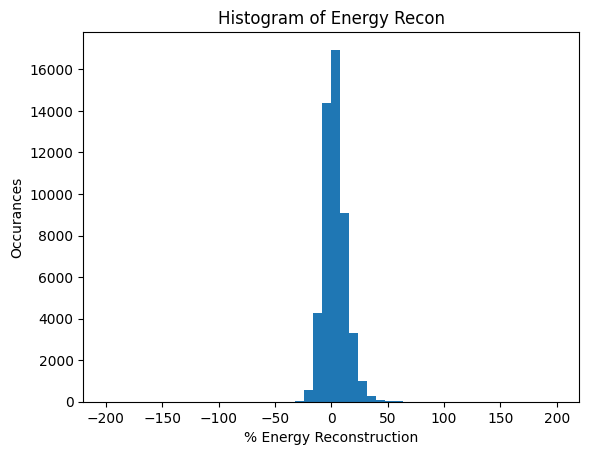

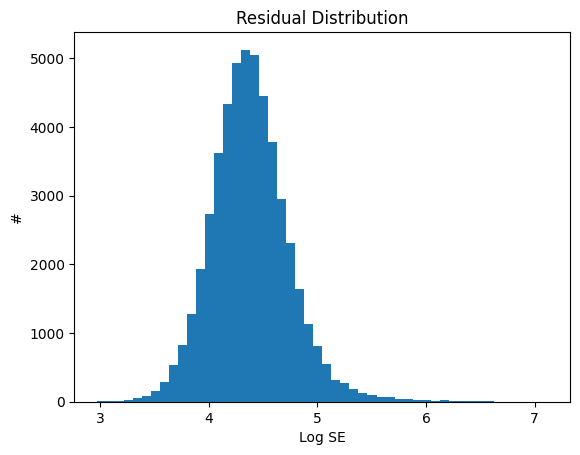

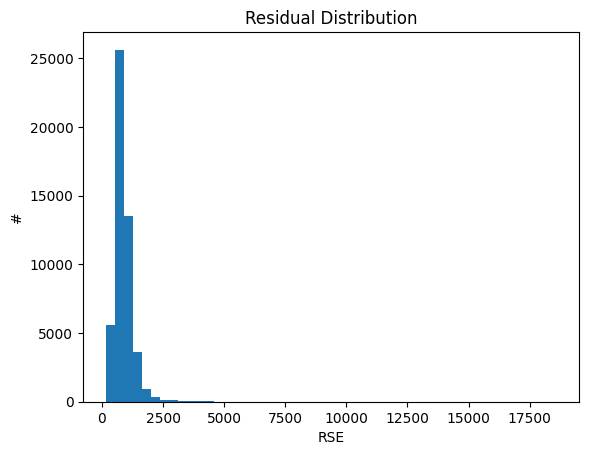

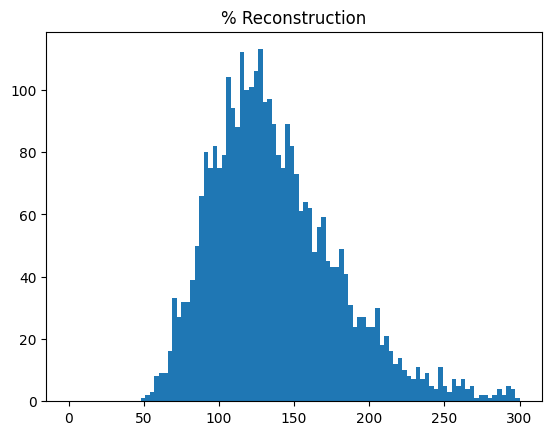

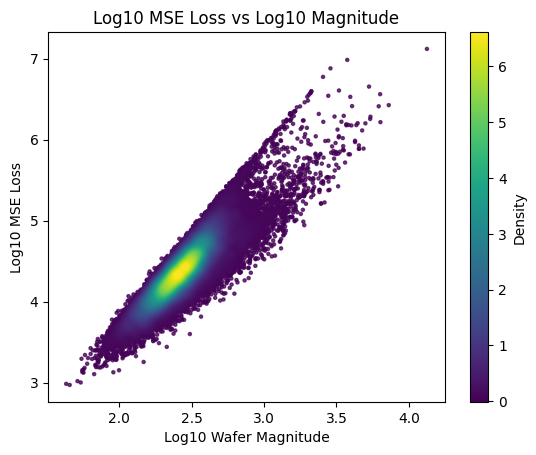

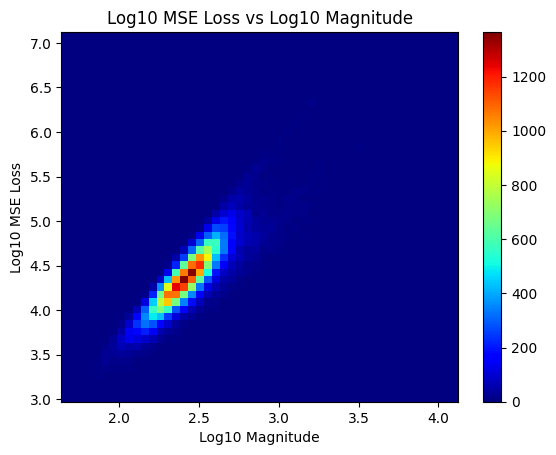

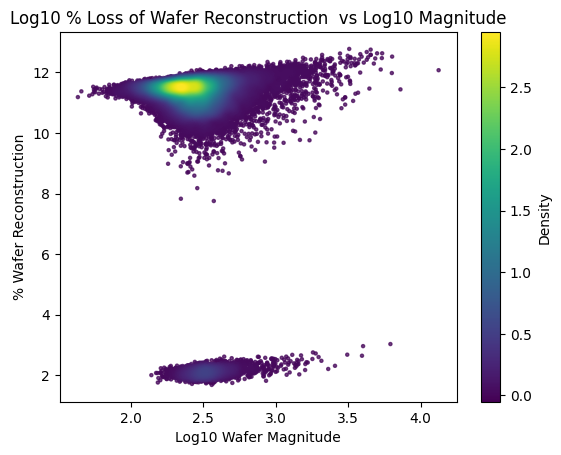

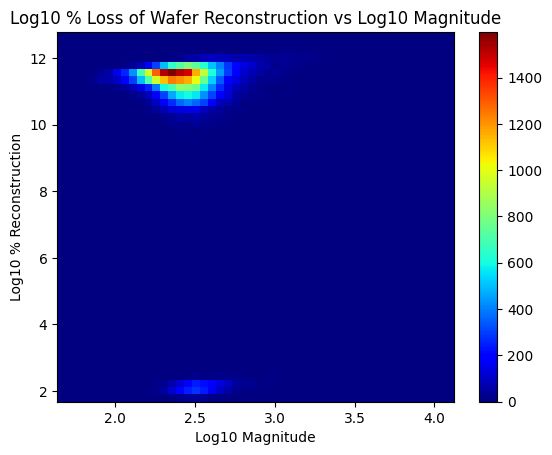

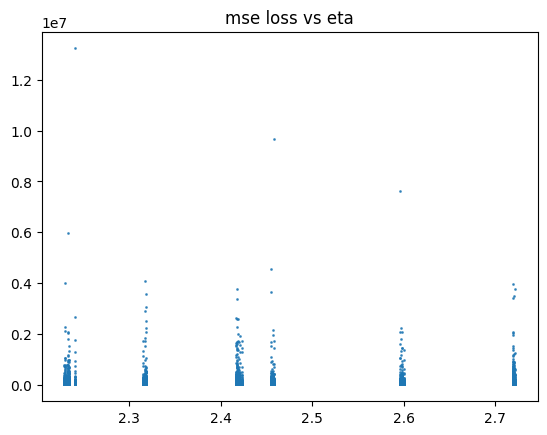

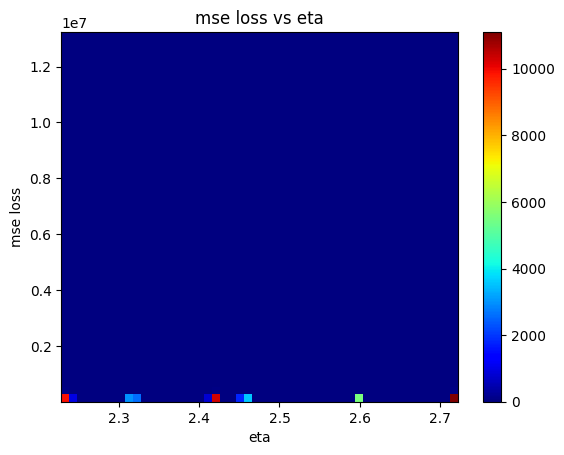

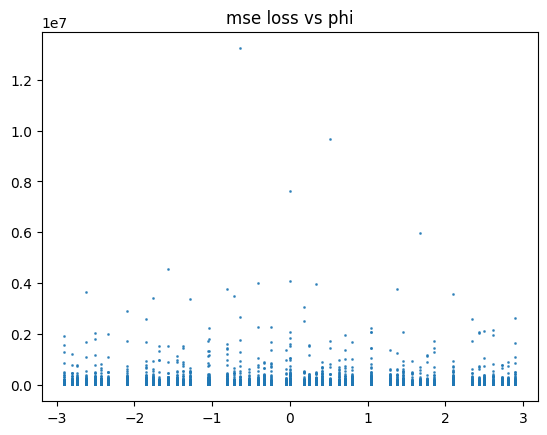

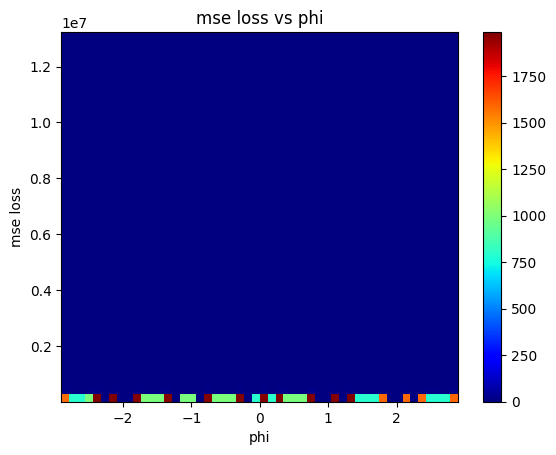

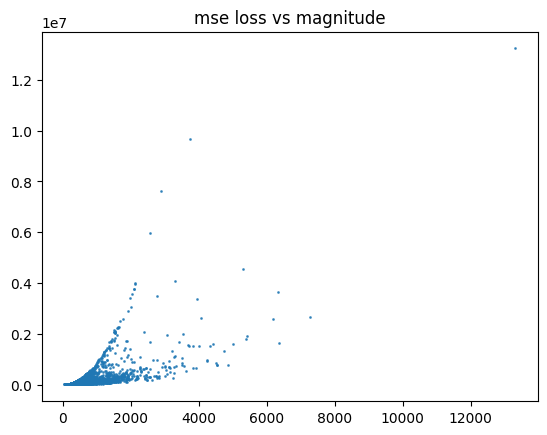

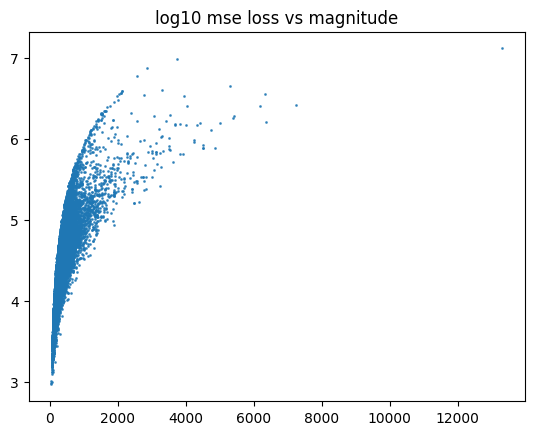

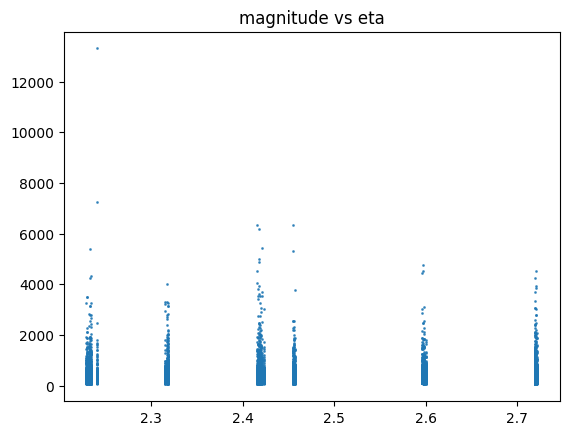

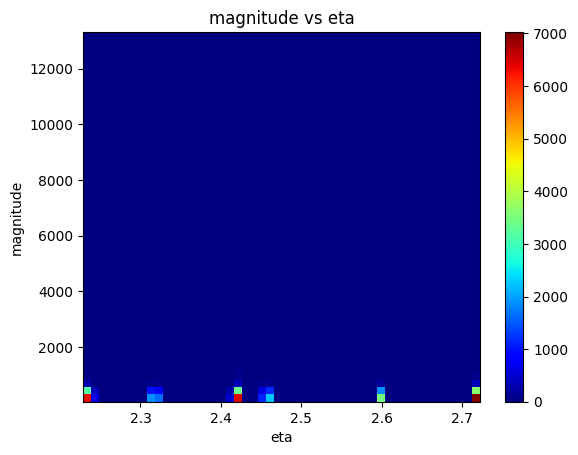

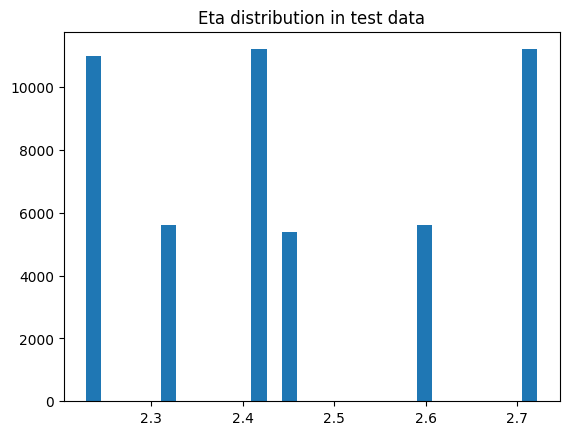

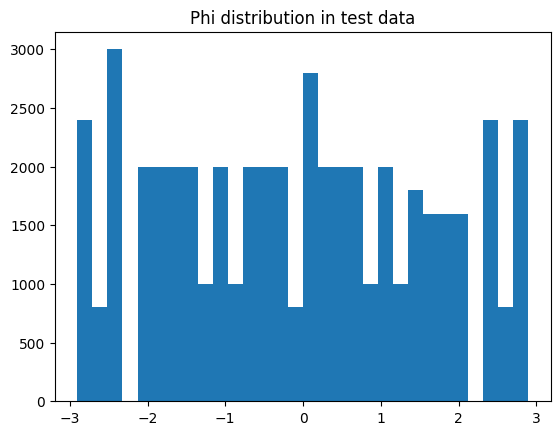

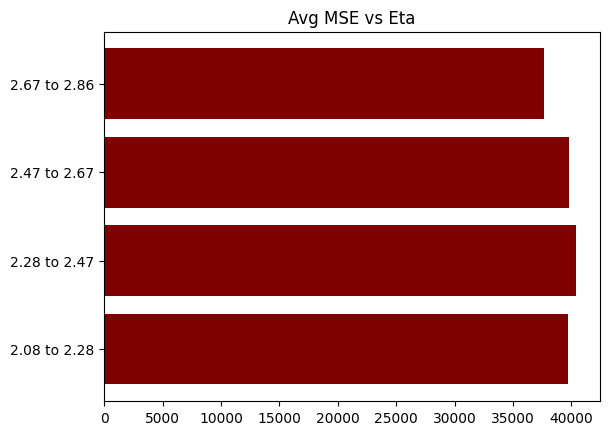

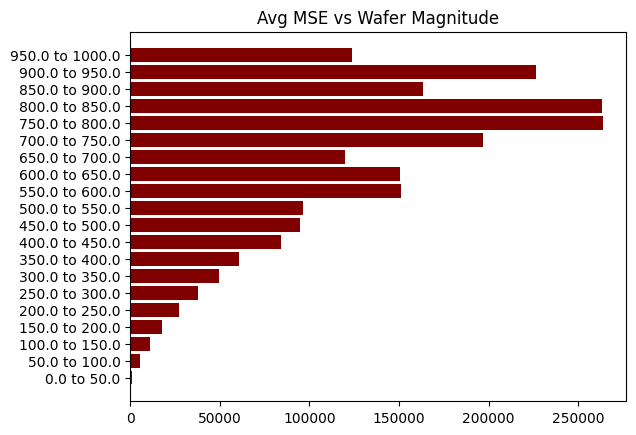

tensor([[ 2.5979e+00,  2.0949e+00,  1.8093e+02,  8.0186e+03,  5.1803e+02],
        [ 2.2336e+00,  4.0819e-01,  6.0172e+02,  1.8539e+05,  2.2021e+03],
        [ 2.7220e+00,  1.3834e+00,  2.8680e+02,  3.0334e+04,  9.5357e+02],
        ...,
        [ 2.2331e+00,  1.6786e+00,  2.0286e+02,  1.4484e+04,  7.1439e+02],
        [ 2.7206e+00, -2.8084e+00,  2.9070e+02,  1.6087e+04,  6.6397e+02],
        [ 2.7200e+00, -2.4272e+00,  2.2317e+02,  1.4723e+04,  6.3476e+02]],
       grad_fn=<CatBackward0>)

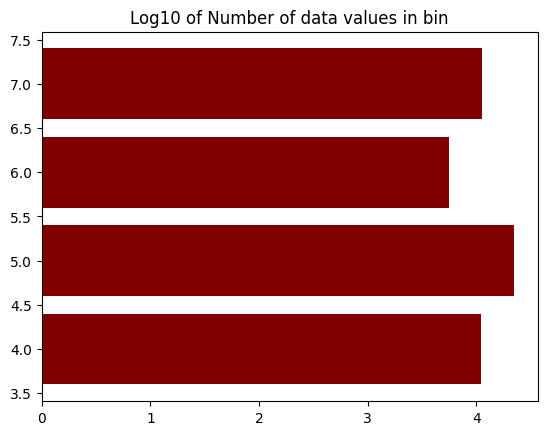

In [124]:
# fine-tune autoencoder
#batch 500


model_5 = Naive_DAE([48,48,16])

optimizer = optim.Adam(model_5.parameters(), lr,weight_decay=5e-2)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor = 0.5)

all_test_losses = []
all_train_losses = []
# train
running_loss = float("inf")
for epoch in range(num_epochs):
    
    losses = []
    
    for i, data_list in enumerate(train_dl_flat):
        model_5.train()
        data = data_list[0]
        
        v_pred = model_5(data)
        
        batch_loss = loss(data, v_pred) # difference between actual and reconstructed   
        
        
        all_train_losses.append(batch_loss.item())
        losses.append(batch_loss.item())
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    scheduler.step(batch_loss)
    data_test = test
    model_5.eval()
    test_pred = model_5(data_test)
    batch_test = loss(data_test, test_pred)
    running_loss = np.mean(losses)
    running_test_loss = batch_test.item()
    print('Epoch {}, lr {}'.format(
        epoch, optimizer.param_groups[0]['lr']))
    
    print(f"Epoch {epoch}: Train {running_loss}, Test {running_test_loss}")
model_5.eval()
AE_Stats.gen_all_stats(model_5(test),test,test_loc)

In [79]:
loss(test_pred,test)

tensor(24.8073, grad_fn=<MeanBackward0>)

array([[-5.8223397e-02,  1.0309630e-01,  1.4471950e-02, ...,
        -1.1442567e-02,  1.0497388e-01,  2.4686344e-02],
       [-5.5935137e-02,  3.5468377e-02,  2.5981382e-02, ...,
         2.2084080e-04, -5.2338287e-02, -2.1840783e-02],
       [-3.3731431e-02, -9.7823270e-02,  1.4741638e-01, ...,
         1.1774954e-01,  4.9301058e-01,  2.4761832e-01],
       ...,
       [-8.0529027e-02, -1.6753128e-02,  2.9782144e-02, ...,
        -2.2992579e-02, -7.6093666e-02, -1.5388532e-02],
       [-8.2466908e-02, -3.4616418e-02,  1.4821054e-02, ...,
        -1.7447595e-02, -6.1796214e-02, -2.7009584e-02],
       [-9.7977027e-02, -6.4595312e-02,  8.7925427e-02, ...,
         1.8517811e-02, -7.7560194e-02,  2.6885509e-02]], dtype=float32)

In [84]:
torch.nn.MSELoss()(test_pred,test)

tensor(0.5168, grad_fn=<MseLossBackward0>)